## Questão de negócio

O estudo tem por objetivo encontrar regiões do Brasil para recomendar o lançamento do produto “Escola para ensino de robótica para crianças de 4 a 14 anos” para uma área de negócio de uma empresa fictícia. Para isso será traçado um público alvo com relação a faixa etária, perfil demográfico, geográfico e econômico e dessa forma haverá a possibilidade de identificar quais cidades ou regiões estariam aptas a receber o produto.

# Integrantes do grupo:

- Daniele dos Santos Rosa TIA: 10922510631
- Gabriel Conde Silva TIA: 10922510443
- Gabriel Gonçalves Furtado TIA: 10922514511
- Hugo Felipe Gomes Santos TIA: 10922500049
- Lucas Silva Ribeiro TIA: 10922520473
- Paulo Henrique Silva Lopes TIA: 10922514864

## 0.0 Imports

In [1]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.2/859.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

## 0.1 Carregando os dados

In [ ]:
df = pd.read_csv("BRAZIL_CITIES_REV2022.CSV")
df.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4


# 1.0 Descrição dos Dados

## 1.1 Dimensionamento dos dados

In [ ]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 5578
Number of Cols: 81


## 1.2 Verificando os NA's

In [ ]:
print(df.shape)
print(df.isnull().sum())

(5578, 81)
CITY                 0
STATE                0
CAPITAL              0
IBGE_RES_POP         0
IBGE_RES_POP_BRAS    0
                    ..
Wheeled_tractor      0
UBER                 0
MAC                  0
WAL-MART             0
POST_OFFICES         0
Length: 81, dtype: int64


## 1.3 Data Types

In [ ]:
df.dtypes

CITY                 object
STATE                object
CAPITAL               int64
IBGE_RES_POP          int64
IBGE_RES_POP_BRAS     int64
                      ...  
Wheeled_tractor       int64
UBER                  int64
MAC                   int64
WAL-MART              int64
POST_OFFICES          int64
Length: 81, dtype: object

## 1.4 Estatistica descritiva

In [ ]:
# numerical attributes
num_attributes = df.select_dtypes (include=['int64', 'float64'])

# categorical attributes
cat_attributes = df.select_dtypes (exclude=['int64', 'float64'])

### 1.4.1 Atributos Numéricos

In [ ]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis())).T

# concat
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

### 1.4.2 Frequencia IDHM

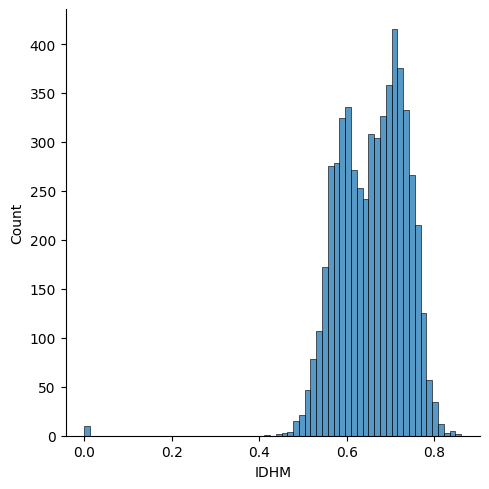

In [ ]:
sns.displot(df['IDHM'], kde=False)

### 1.4.3 Dispersão da população

In [ ]:
df = df[(df['LAT'] != 0) & (df['LONG'] != 0)]

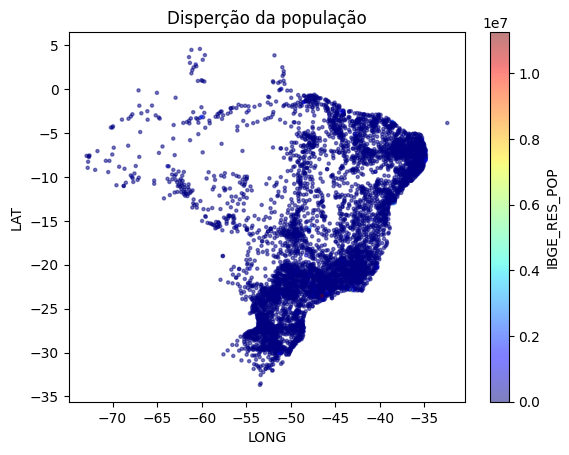

In [ ]:
# cria o gráfico de dispersão
ax = df.plot(kind='scatter', x='LONG', y='LAT', alpha=0.5, s=5, c='IBGE_RES_POP', cmap='jet')
ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Disperção da população')

# exibe o gráfico
plt.show()

In [ ]:
# cria o gráfico de dispersão
ax = novo_df.plot(kind='scatter', x='LONG', y='LAT', alpha=0.5, s=5, c='IBGE_RES_POP', cmap='jet')
ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Disperção da população em cidades com crianças de 5 a 14 anos')

# exibe o gráfico
plt.show()

NameError: ignored

In [ ]:
# Quantidade de cidades pela média ou 1 mil crianças
print((df['IBGE_5-9']>=df['IBGE_5-9'].mean()).sum())
print((df['IBGE_10-14']>=df['IBGE_10-14'].mean()).sum())
print((df['IBGE_5-9']>=1000).sum())
print((df['IBGE_10-14']>=1000).sum())

In [ ]:
# Intersecção das cidades entre crianças

# seleciona as linhas em que as colunas IBGE_5-9 e IBGE_10-14 são maiores que 1000
selecao = (df['IBGE_5-9'] > 1000) & (df['IBGE_10-14'] > 1000)
df_selecionado = df[selecao]

# faz a intersecção entre as colunas IBGE_5-9 e IBGE_10-14 do DataFrame selecionado
intersecao = df_selecionado.loc[df_selecionado['IBGE_5-9'].isin(df_selecionado['IBGE_10-14'])]['IBGE_5-9']

print(len(intersecao))
intersecao.head()

### 1.4.4 Análise do PIB Industrial

In [ ]:
# criar o gráfico de dispersão
ax = df.plot(kind='scatter', x='LONG', y='LAT', alpha=0.5, s=5, c='GVA_INDUSTRY', cmap='jet')
ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Disperção da do PIB da indústria')

plt.show()

In [ ]:
# criar o gráfico de dispersão
ax = novo_df.plot(kind='scatter', x='LONG', y='LAT', alpha=0.5, s=5, c='GVA_INDUSTRY', cmap='jet')
ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Disperção da do PIB da indústria nas cidades que preenchem os requisitos')

plt.show()

In [ ]:
# filtra as linhas com as condições especificadas
filtro = (df['IDHM'] > 0.700) & (df['IBGE_5-9'] > 1000) & (df['IBGE_10-14'] > 1000) & (df['GVA_INDUSTRY'] > df['GVA_INDUSTRY'].mean())
novo_df = df.loc[filtro]

novo_df.shape

## 1.5 Cidades aptas a receberem a escola

In [ ]:
# cria o gráfico de dispersão
ax = novo_df.plot(kind='scatter', x='LONG', y='LAT', alpha=0.5, s=5, c='GVA_INDUSTRY', cmap='jet')
ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Cidades passíveis de receber os serviços da escola')

plt.show()

In [ ]:
novo_df['CITY'].unique()

In [ ]:
# cria o gráfico de dispersão
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_title('Gráfico de Dispersão - LONG x LAT')

# adiciona o mapa do Brasil como fundo do gráfico
m = Basemap(projection='mill', llcrnrlat=-35, urcrnrlat=5, llcrnrlon=-85, urcrnrlon=-35, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='#f0f0f0', lake_color='#ffffff')
m.drawmapboundary(fill_color='#ffffff')

# plota os pontos do DataFrame
x, y = m(novo_df['LONG'].values, novo_df['LAT'].values)
m.scatter(x, y, s=5, c=novo_df['IDHM'], cmap='jet', alpha=0.5)

# adiciona a barra de cores
cbar = plt.colorbar(orientation='vertical', shrink=0.5)
cbar.set_label('IDHM')

# exibe o gráfico
plt.show()

## 1.6 Conclusões
- As regiões que mais tem cidades que estão dentro do critério criado são as da região sul e sudeste com bons destaques para as capitais do nordeste e e centro-oeste, dessa forma recomenda-se o lançamento da escola nessas regiões com destaque para a região nordeste pois em breve pesquisa, aparecem menos concorrentes que nas regiões sul e sudeste. Também podemos considerar a cidade de Manaus, pois atende a todos os requisitos, tendo um dos maiores PIBs indústriais do país.